## In this notebook we demonstrate the use of the package Achedmy on two different reaction systems and compare it to mass action kinetics:

In [238]:
collect(n′ + n′′ for n′ in [1,2,3], n′′ in [2,3,5] if n′ == n′′)

2-element Vector{Int64}:
 4
 6

In [1]:
push!(LOAD_PATH, "../src/Achedmy/")
using Revise
using Achedmy
using Pkg
using PyPlot
using Catalyst
using LinearAlgebra
using DifferentialEquations

using Revise
#include("../src/Achedmy/Achedmy.jl")
#Revise.includet("../src/Achedmy/Achedmy.jl")

#includet("../src/Achedmy/Achedmy.jl")

#using .Achedmy

using Achedmy

#using "../src/Achedmy/Achedmy.jl"
using Pkg
#Pkg.add(path="../src/Achedmy/Achedmy.jl")
using PyPlot
using Catalyst
using LinearAlgebra
using DifferentialEquations

In [652]:
#Parameters simulation
tstart= 0.
tmax = 0.01
atol = 1e-3
rtol = 1e-2

0.01

### Define the reaction system $A+A \rightarrow A$ and the defaults or initialization using Catalyst:

In [645]:
rs_aaa = @reaction_network AAA begin
    @species A(t)= 4. /3
    @parameters k1A = 1. k2A = 1. k3 = 1. 
  (k3), A+A --> A
  (k2A,k1A), A <--> 0 
end

Model AAA
States (1):
  A(t) [defaults to 1.33333]
Parameters (3):
  k1A [defaults to 1.0]
  k2A [defaults to 1.0]
  k3 [defaults to 1.0]

#### Define the reaction structure in the form more convinient to us:

In [612]:
structure_aaa = Achedmy.ReactionStructure(rs_aaa)

ReactionStructure{Int64, Vector{Float64}, Matrix{Int64}, Vector{Float64}, Vector{Any}, Vector{Vector{Int64}}}(1, 1, 3, [1.0], [1.0], [1.0], [1;;], [2;;], [1.3333333333333333], Any[[[0], [1], [2]]], [[0], [1], [2]])

#### Define the varianbles for the reaction which are updated in place when we run the dynamics:

In [704]:
variables_aaa = nothing

In [705]:
variables_aaa = Achedmy.ReactionVariables(structure_aaa,"cross")
sol_aaaSBR = Achedmy.solve_dynamics!(structure_aaa,variables_aaa,atol,rtol,tmax,tstart,"SBR-mix");

t: 0.0
t: 1.0e-6
t: 5.999999999999999e-6
t: 2.5268886890828982e-5
t: 5.497889321150827e-5
t: 0.00016382768411291412
t: 0.0005135114816579127
t: 0.001372742569128755
t: 0.0027944727971020425
t: 0.005943919454371068
  2.582099 seconds (3.33 M allocations: 178.067 MiB, 5.35% gc time, 98.83% compilation time: 81% of which was recompilation)


In [689]:
variables_aaa_old = Achedmy.ReactionVariables(structure_aaa,"cross")
sol_aaaSBR_old = Achedmy.solve_dynamics!(structure_aaa,variables_aaa_old,atol,rtol,tmax,tstart,"SBR");

t: 0.0
t: 1.0e-6
t: 5.999999999999999e-6
t: 2.5268886890828982e-5
t: 5.497889321164006e-5
t: 0.00016382768614176863
t: 0.0005135115377147813
t: 0.0013727423800593528
t: 0.0027944748814321117
t: 0.005943760364436222
  0.038303 seconds (137.92 k allocations: 5.677 MiB)


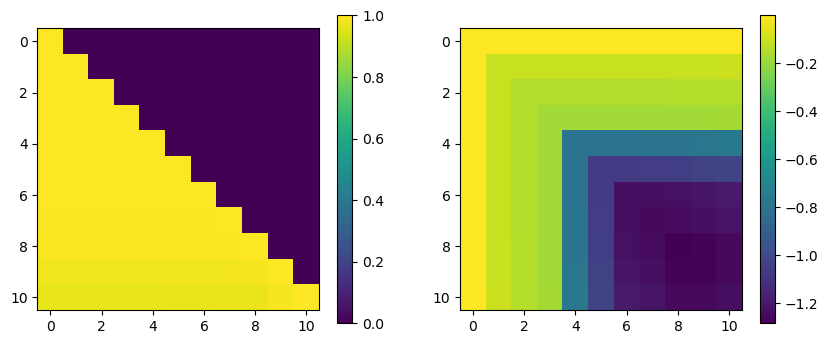

PyObject <matplotlib.colorbar.Colorbar object at 0x7fe04cbb6210>

In [706]:
figure(figsize=(10,4))
subplot(121)
imshow(variables_aaa.R[1,1,:,:])
colorbar()

subplot(122)
#imshow(variables_aaa.C[1,1,1:length(sol_aaaSBR.w),1:length(sol_aaaSBR.w)])
imshow(variables_aaa.C[1,1,:,:])
colorbar()

In [702]:
diag(variables_aaa.C[1,1,:,:])

11-element Vector{Float64}:
 -4.469894442719558e-8
 -0.1088023519981956
 -0.1469317195411402
 -0.1805530506728736
 -0.795593126409962
 -1.0569511133544427
 -1.2346692729045494
 -1.2513474936931832
 -1.2841136370755943
 -1.269724464941052
 -1.2330845451754129

In [703]:
diag(variables_aaa_old.C[1,1,:,:])

11-element Vector{Float64}:
 -4.469894442719558e-8
 -0.1088022431953213
 -0.14693917462958103
 -0.1838472908801804
 -0.8395014360021369
 -1.1340477637517967
 -1.333898184438026
 -1.3903453802319206
 -1.4926987374997374
 -1.5100900728729214
 -1.4721942442551597

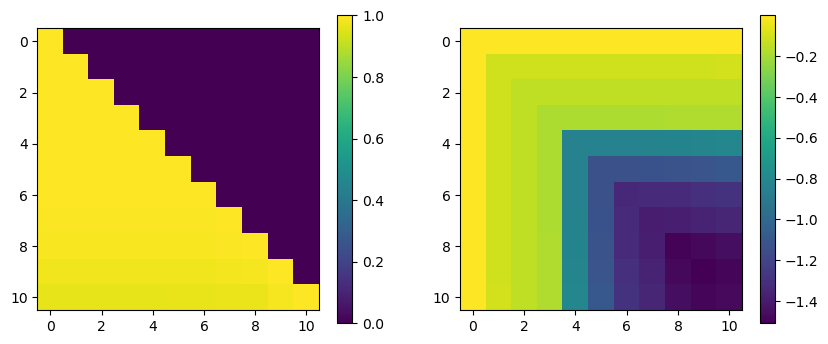

PyObject <matplotlib.colorbar.Colorbar object at 0x7fe04e896330>

In [672]:
figure(figsize=(10,4))
subplot(121)
imshow(variables_aaa_old.R[1,1,:,:])
colorbar()

subplot(122)
#imshow(variables_aaa.C[1,1,1:length(sol_aaaSBR.w),1:length(sol_aaaSBR.w)])
imshow(variables_aaa_old.C[1,1,:,:])
colorbar()

In [686]:
variables_aaa_old.C[1,1,:,:]

11×11 Matrix{Float64}:
 -4.46989e-8  -4.46987e-8  -4.46979e-8  -4.46948e-8  -4.46899e-8  …  -4.44748e-8  -4.42448e-8  -4.37424e-8  -4.31096e-8
 -4.46987e-8  -0.108802    -0.1088      -0.108793    -0.108781       -0.108257    -0.107697    -0.106474    -0.104934
 -4.46979e-8  -0.1088      -0.146939    -0.146927    -0.146911       -0.146205    -0.145448    -0.143797    -0.141717
 -4.46948e-8  -0.108793    -0.146927    -0.183847    -0.183827       -0.182942    -0.181996    -0.179929    -0.177326
 -4.46899e-8  -0.108781    -0.146911    -0.183827    -0.839501       -0.835338    -0.831018    -0.821584    -0.809701
 -4.46721e-8  -0.108737    -0.146853    -0.183753    -0.839041    …  -1.12904     -1.1232      -1.11044     -1.09437
 -4.46149e-8  -0.108598    -0.146665    -0.183518    -0.837967       -1.32953     -1.32265     -1.30763     -1.28871
 -4.44748e-8  -0.108257    -0.146205    -0.182942    -0.835338       -1.39035     -1.38315     -1.36744     -1.34766
 -4.42448e-8  -0.107697    -0.1454

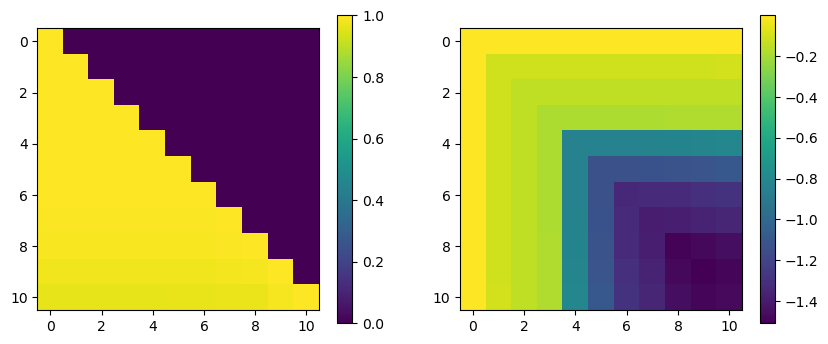

PyObject <matplotlib.colorbar.Colorbar object at 0x7fe04c924a10>

In [707]:
figure(figsize=(10,4))
subplot(121)
imshow(variables_aaa_old.R[1,1,:,:])
colorbar()

subplot(122)
#imshow(variables_aaa.C[1,1,1:length(sol_aaaSBR.w),1:length(sol_aaaSBR.w)])
imshow(variables_aaa_old.C[1,1,:,:])
colorbar()

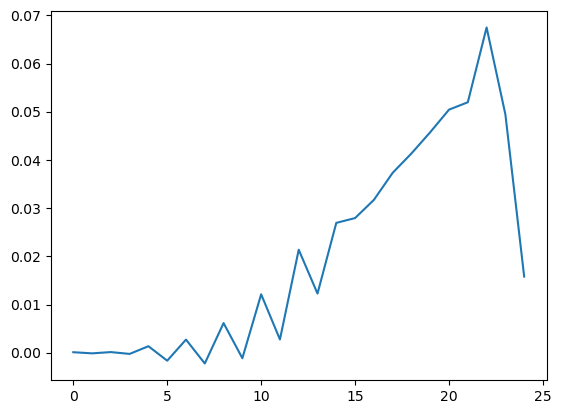

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x7fe04e897e60>

In [618]:
plot(sol_aaaSBR.w[end])

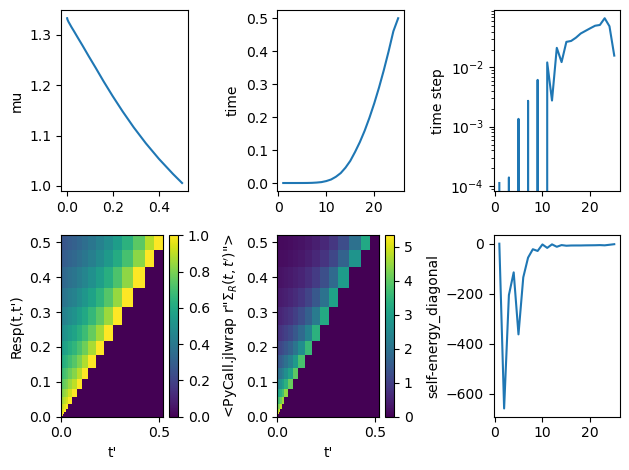

In [500]:
plot_all_moddiag_cross(variables_aaa,sol_aaaSBR)

In [571]:
variables_aaa2 = Achedmy.ReactionVariables(structure_aaa,"single")
sol_aaaSBR2 = Achedmy.solve_dynamics!(structure_aaa,variables_aaa2,atol,rtol,tmax,tstart,"SBR");

t: 0.0
7.1111111111111117.111111111111111t: 1.0e-6
14.22190973137835714.221909736125507t: 5.999999999999999e-6
21.3280352592265221.329458684786868t: 2.5268886890828982e-5
28.43330245125600428.434255242072858t: 5.49788932116329e-5
35.5054284154112735.51308760642186t: 0.00016382768614738052
42.50580259836882442.50590404695043t: 0.0005135115378184959
49.2268141549304549.26803449259651t: 0.0013727423814626917
55.70653801236548555.70880417217195t: 0.002794474893405373
61.00306207083589561.131754869680904t: 0.005943760479422423
65.4705054196067465.5006966937596t: 0.010715374025071566
67.3710185777751667.59327039795474t: 0.018954585031091715
67.6898335296630367.85367509904927t: 0.030119810059514182
64.8298471539401165.06067415820175t: 0.04662357309503072
60.1731358869943160.61742890779037t: 0.06727832121753621
53.86391086961493453.92654521334827t: 0.09463305369655937
47.5238128293087347.55075455939967t: 0.12483704266715683
41.1310122535567641.11407908572534t: 0.15983726228448708
34.9340655751

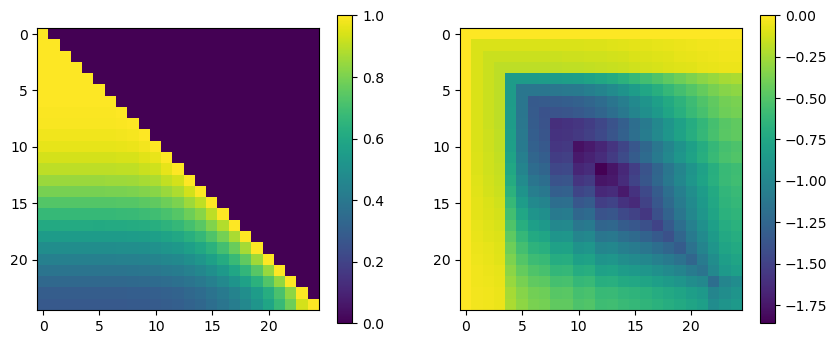

PyObject <matplotlib.colorbar.Colorbar object at 0x7fe04f84e8d0>

In [572]:
figure(figsize=(10,4))
subplot(121)
imshow(variables_aaa2.R[1,:,:])
colorbar()

subplot(122)
#imshow(variables_aaa.C[1,1,1:length(sol_aaaSBR.w),1:length(sol_aaaSBR.w)])
imshow(variables_aaa2.C[1,:,:])
colorbar()

In [395]:
variables_aaa3 = Achedmy.ReactionVariables(structure_aaa,"single")
sol_aaaSBR3 = Achedmy.solve_dynamics!(structure_aaa,variables_aaa3,atol,rtol,tmax,tstart,"MAK");

t: 0.0
t: 1.0e-6
t: 5.999999999999999e-6
t: 2.5268893904444677e-5
t: 5.497893255230556e-5
t: 0.00016382839587001098
t: 0.0005135137841929381
t: 0.0013727770861161062
t: 0.0027945981907456013
t: 0.005944359486111527
t: 0.010716085587530927
t: 0.018958034553299252
t: 0.03012025387963076
t: 0.046627290751190285
t: 0.06725271817426506
t: 0.09458606867256211
t: 0.12470516501794626
t: 0.15960038845148097
t: 0.19978541270367334
t: 0.24451770400257153
t: 0.2943055557181668
t: 0.3492833646155198
t: 0.4093711531622418
t: 0.47472186164390706
  0.032430 seconds (60.93 k allocations: 3.493 MiB)


In [396]:
variables_aaa4 = Achedmy.ReactionVariables(structure_aaa,"single")
sol_aaaSBR4 = Achedmy.solve_dynamics!(structure_aaa,variables_aaa4,atol,rtol,tmax,tstart,"SBR");

t: 0.0
7.1111111111111117.111111111111111t: 1.0e-6
14.22190973137835714.221909736125507t: 5.999999999999999e-6
21.3280352592265221.329458684786868t: 2.5268886890828982e-5
28.43330245125600428.434255242072858t: 5.49788932116329e-5
35.5054284154112735.51308760642186t: 0.00016382768614738052
42.50580259836882442.50590404695043t: 0.0005135115378184959
49.2268141549304549.26803449259651t: 0.0013727423814626917
55.70653801236548555.70880417217195t: 0.002794474893405373
61.00306207083589561.131754869680904t: 0.005943760479422423
65.4705054196067465.5006966937596t: 0.010715374025071566
67.3710185777751667.59327039795474t: 0.018954585031091715
67.6898335296630367.85367509904927t: 0.030119810059514182
64.8298471539401165.06067415820175t: 0.04662357309503072
60.1731358869943160.61742890779037t: 0.06727832121753621
53.86391086961493453.92654521334827t: 0.09463305369655937
47.5238128293087347.55075455939967t: 0.12483704266715683
41.1310122535567641.11407908572534t: 0.15983726228448708
34.9340655751

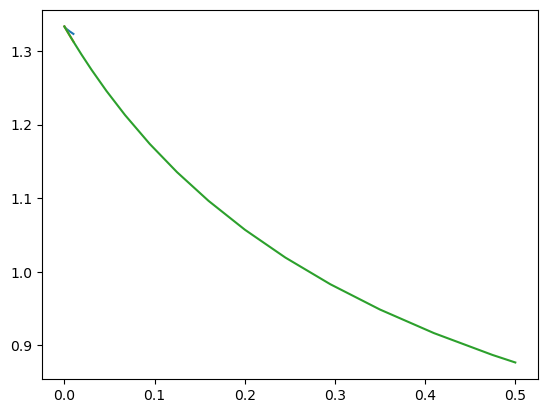

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x7fe04cd75130>

In [694]:
plot(sol_aaaSBR.t,variables_aaa.μ[1,:])
plot(sol_aaaSBR_old.t,variables_aaa_old.μ[1,:])
plot(sol_aaaSBR2.t,variables_aaa2.μ[1,:])
#plot(sol_aaaSBR3.t,variables_aaa3.μ[1,:])
#plot(sol_aaaSBR4.t,variables_aaa4.μ[1,:])

In [354]:
variables_aaa.μ .- variables_aaa2.μ

LoadError: DimensionMismatch: arrays could not be broadcast to a common size; got a dimension with lengths 51 and 25

In [10]:
variables_aaa.Σ_B[1,:,:]

LoadError: BoundsError: attempt to access 1×1×51×51 KadanoffBaym.GreenFunction{Float64, 4, Array{Float64, 4}, KadanoffBaym.Symmetrical} at index [1, 1:1, 1:51]

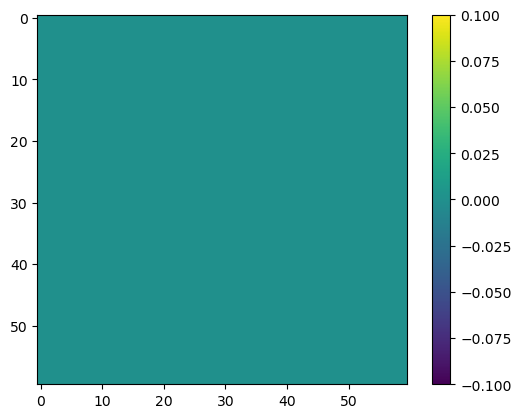

PyObject <matplotlib.colorbar.Colorbar object at 0x7ff783bf27e0>

In [18]:
imshow(variables_aaa.C[1,:,:])
colorbar()

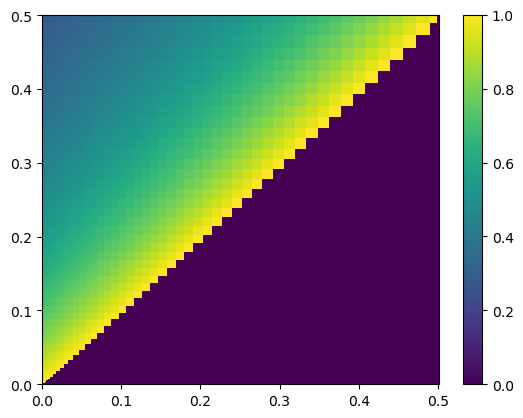

PyObject <matplotlib.colorbar.Colorbar object at 0x7ff74a786330>

In [22]:
pcolor(sol_aaaSBR.t,sol_aaaSBR.t,variables_aaa.R[1,:,:])
colorbar()

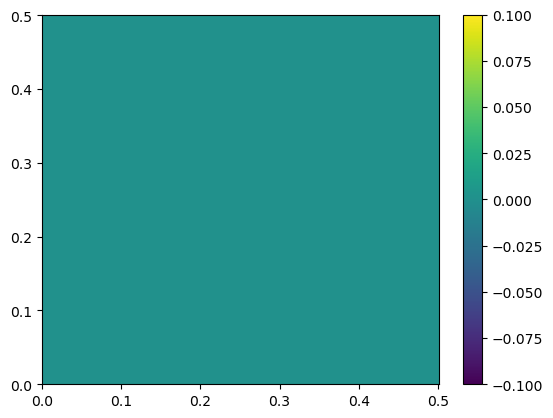

PyObject <matplotlib.colorbar.Colorbar object at 0x7ff74a498bf0>

In [23]:
pcolor(sol_aaaSBR.t,sol_aaaSBR.t,variables_aaa.C[1,:,:])
colorbar()

#### Compare with Mass action or Mean field:

In [9]:
oprob_aaa = solve(ODEProblem(rs_aaa,[],(tstart,tmax),combinatoric_ratelaws=false),saveat = sol_aaaSBR.t)
sol_aaaMAK = [oprob_aaa.u[i][1] for i in 1:length(oprob_aaa.t)]

123-element Vector{Float64}:
 1.3333333333333333
 1.3333312222260902
 1.3333206668059154
 1.3332982753729319
 1.333270063565802
 1.3331798052039
 1.3329720872977813
 1.3325435399615084
 1.3318898946367013
 1.3306918476176677
 1.329024590183538
 1.3264739141084632
 1.3232261184749499
 ⋮
 0.6299149313882064
 0.6291902920833498
 0.6285068093149142
 0.6278624696878682
 0.6272552812236614
 0.6266832801545487
 0.6261445377448965
 0.6256371671353792
 0.62515933020643
 0.6247092444577552
 0.6242851899011429
 0.6242450051844356

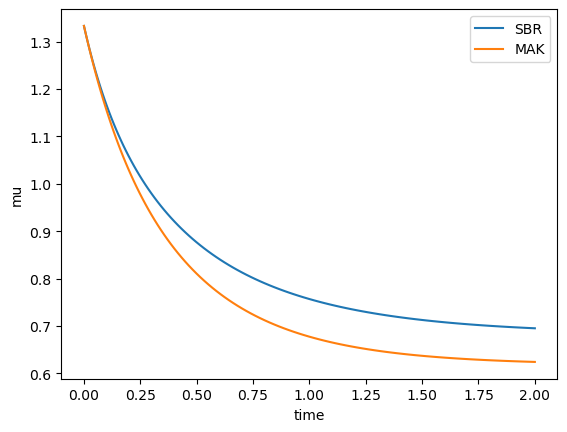

PyObject <matplotlib.legend.Legend object at 0x7f020f3d4650>

In [10]:
plot(sol_aaaSBR.t,variables_aaa.μ[1,:],label="SBR")
plot(oprob_aaa.t,sol_aaaMAK,label="MAK")
ylabel("mu")
xlabel("time")
legend()

### Define the $A+B \rightarrow C$ reaction:

In [11]:
rs_abc = @reaction_network ABC begin
    @species A(t) = 4. /3 B(t) = 2.0 C(t) = 1.0
    @parameters k1A = 4 k1B = 4 k1C = 3 k2A = 3 k2B = 2 k2C = 3 k3 = 1.
  (k3), A+B --> C
  (k2A,k1A), A <--> 0
  (k2B,k1B), B <--> 0
  (k2C,k1C), C <--> 0  
end

Model ABC
States (3):
  A(t) [defaults to 1.33333]
  B(t) [defaults to 2.0]
  C(t) [defaults to 1.0]
Parameters (7):
  k1A [defaults to 4]
  k1B [defaults to 4]
  k1C [defaults to 3]
  k2A [defaults to 3]
  k2B [defaults to 2]
  k2C [defaults to 3]
⋮

In [12]:
structure_abc = ReactionStructure(rs_abc)
variables_abc = ReactionVariables(structure_abc,"single")
sol_abcSBR    = solve_dynamics!(structure_abc,variables_abc,atol,rtol,tmax,tstart,"SBR-mix");

t: 0.0
t: 1.0e-6
t: 5.999999999999999e-6
t: 1.6864687963672578e-5
t: 3.0642564501344665e-5
t: 7.338079094497726e-5
t: 0.00017161779169591504
t: 0.000371783566360389
t: 0.0006758278114652881
t: 0.0012299860913578802
t: 0.002000340518064036
t: 0.003177216174493502
t: 0.0046791886806422205
t: 0.006722288162596488
t: 0.009172108887699204
t: 0.012240516127284518
t: 0.015755325034202104
t: 0.019907296573997455
t: 0.02450783589091823
t: 0.029720729211824663
t: 0.03535953423524923
t: 0.04156202190882891
t: 0.04815561701019028
t: 0.05525600686740643
t: 0.06270960273025972
t: 0.0706146214411012
t: 0.0788369961031673
t: 0.08746171067991007
t: 0.09637225463691548
t: 0.10564388405123598
t: 0.11486315788827849
t: 0.12425445936841086
t: 0.1338093057698426
t: 0.14348585013488407
t: 0.15331829007654652
t: 0.16330464698312921
t: 0.1734424743326897
t: 0.18373760195742617
t: 0.1941902283125172
t: 0.2048006958394187
t: 0.2155699214699944
t: 0.22649778670881943
t: 0.23758403520203572
t: 0.2488282632214148
t

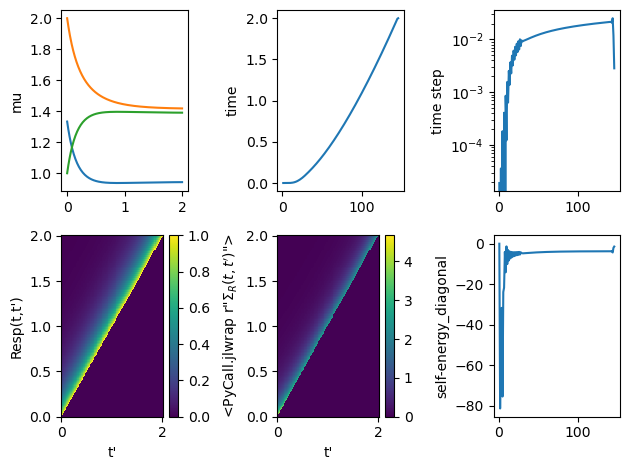

In [15]:
plot_all_moddiag(variables_abc,sol_abcSBR)

In [7]:
function plot_all_moddiag(rxn_variables,solution)
    
    #Plots the diagonal values separately for the self-energy
    #This equalizes the scale difference so that the values are better visible
    
    subplot(231)
    for i in 1:length(rxn_variables.μ[:,1])
        PyPlot.plot(solution.t, rxn_variables.μ[i,:])
    end
    #PyPlot.plot(solution.t, rxn_variables.μ[1,:])
    #PyPlot.plot(solution.t, rxn_variables.μ[2,:])
    #PyPlot.plot(solution.t, rxn_variables.μ[3,:])
    ylabel("mu")

    subplot(232)
    PyPlot.plot(1:length(solution.t),solution.t)
    ylabel("time")

    subplot(233)bb
    PyPlot.plot(1:length(solution.t),solution.w[length(solution.t)])
    ylabel("time step")
    yscale("log")

    subplot(234)
    #imshow(rxn_variables.R[1,:,:])
    pcolor(solution.t,solution.t,rxn_variables.R[1,:,:],shading="auto")
    colorbar()
    #colorbar(shrink=0.6)
    ylabel("Resp(t,t')")
    xlabel("t'")
    
    temp = deepcopy(rxn_variables.Σ_R[1,1:length(solution.t),1:length(solution.t)])
    
    for i in 1:length(solution.t)
        #temp[i,i] *= solution.w[length(solution.t)][i]
        temp[i,i] = 0
    end
    
    subplot(235)
    #imshow(temp)
    pcolor(solution.t,solution.t,temp,shading="auto")
    #colorbar(shrink=0.6)
    colorbar()
    ylabel(r"$\Sigma_R (t,t')$")
    xlabel("t'")
    
    subplot(236)
    PyPlot.plot(1:length(solution.t),diag(rxn_variables.Σ_R[1,1:length(solution.t),1:length(solution.t)].*abs.(solution.w[length(solution.t)])))
    #PyPlot.plot(1:length(solution.t),diag(rxn_variables.Σ_R[1,1:length(solution.t),1:length(solution.t)]))

    ylabel("self-energy_diagonal")
    
    tight_layout()
    
end

plot_all_moddiag (generic function with 1 method)

In [162]:
function plot_all_moddiag_cross(rxn_variables,solution)
    
    #Plots the diagonal values separately for the self-energy
    #This equalizes the scale difference so that the values are better visible
    
    subplot(231)
    for i in 1:length(rxn_variables.μ[:,1])
        PyPlot.plot(solution.t, rxn_variables.μ[i,:])
    end
    #PyPlot.plot(solution.t, rxn_variables.μ[1,:])
    #PyPlot.plot(solution.t, rxn_variables.μ[2,:])
    #PyPlot.plot(solution.t, rxn_variables.μ[3,:])
    ylabel("mu")

    subplot(232)
    PyPlot.plot(1:length(solution.t),solution.t)
    ylabel("time")

    subplot(233)
    PyPlot.plot(1:length(solution.t),solution.w[length(solution.t)])
    ylabel("time step")
    yscale("log")

    subplot(234)
    #imshow(rxn_variables.R[1,:,:])
    pcolor(solution.t,solution.t,rxn_variables.R[1,1,:,:],shading="auto")
    colorbar()
    #colorbar(shrink=0.6)
    ylabel("Resp(t,t')")
    xlabel("t'")
    
    temp = deepcopy(rxn_variables.Σ_R[1,1,1:length(solution.t),1:length(solution.t)])
    
    for i in 1:length(solution.t)
        #temp[i,i] *= solution.w[length(solution.t)][i]
        temp[i,i] = 0
    end
    
    subplot(235)
    #imshow(temp)
    pcolor(solution.t,solution.t,temp,shading="auto")
    #colorbar(shrink=0.6)
    colorbar()
    ylabel(r"$\Sigma_R (t,t')$")
    xlabel("t'")
    
    subplot(236)
    PyPlot.plot(1:length(solution.t),diag(rxn_variables.Σ_R[1,1,1:length(solution.t),1:length(solution.t)].*abs.(solution.w[length(solution.t)])))
    #PyPlot.plot(1:length(solution.t),diag(rxn_variables.Σ_R[1,1:length(solution.t),1:length(solution.t)]))

    ylabel("self-energy_diagonal")
    
    tight_layout()
    
end

plot_all_moddiag_cross (generic function with 1 method)